In [421]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


import statsmodels.api as sm
import scipy.stats as stats

import math



# Objective of this case study is:

### Which variables are significant in predicting the reason for hospitalization for different regions
### How well some variables like viral load, smoking, Severity Level describe the hospitalization charges

### metric discussion: since we have to check how hospitalization charges vary with different factors such as age, smoking habits, gender, region, viral load, etc. , the metric under consideration would be 'hospitalization charges' as depending upon the persona of patients arriving at given hospital,the hospital is better prepared with initial facilities.

In [422]:
df = pd.read_csv("hospitals_data.csv")

In [423]:
df.shape

(1338, 8)

In [424]:
df.isnull().sum()

Unnamed: 0                 0
age                        0
sex                        0
smoker                     0
region                     0
viral load                 0
severity level             0
hospitalization charges    0
dtype: int64

In [425]:
df.dtypes

Unnamed: 0                   int64
age                          int64
sex                         object
smoker                      object
region                      object
viral load                 float64
severity level               int64
hospitalization charges      int64
dtype: object

In [426]:
df.describe()

,Unnamed: 0,age,viral load,severity level,hospitalization charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,668.500000,39.207025,10.221233,1.094918,33176.058296
std,386.391641,14.049960,2.032796,1.205493,30275.029296
min,0.000000,18.000000,5.320000,0.000000,2805.000000
25%,334.250000,27.000000,8.762500,0.000000,11851.000000
50%,668.500000,39.000000,10.130000,1.000000,23455.000000
75%,1002.750000,51.000000,11.567500,2.000000,41599.500000
max,1337.000000,64.000000,17.710000,5.000000,159426.000000


In [427]:
df.tail()

,Unnamed: 0,age,sex,smoker,region,viral load,severity level,hospitalization charges
1333,1333,50,male,no,northwest,10.32,3,26501
1334,1334,18,female,no,northeast,10.64,0,5515
1335,1335,18,female,no,southeast,12.28,0,4075
1336,1336,21,female,no,southwest,8.60,0,5020
1337,1337,61,female,yes,northwest,9.69,0,72853


In [428]:
df.drop(columns='Unnamed: 0',inplace=True)

In [429]:
df.head()

,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,19,female,yes,southwest,9.30,0,42212
1,18,male,no,southeast,11.26,1,4314
2,28,male,no,southeast,11.00,3,11124
3,33,male,no,northwest,7.57,0,54961
4,32,male,no,northwest,9.63,0,9667


### Now we have basic understanding of data, lets analyse the data with objective that:
### 1. we have to check factors responsible for hospitalization charges
### 2. how strong these factors are

### From the initial data display, we can see there are details of person's age, sex,whether he/she is smoker or not, region, viral_load,severity level. And with all these factors, what is the hospitalization charges. Also, lets not drop Unnamed:0 column and lets rename it as person's id.  
### There are 1338 unique rows present in the data with 8 columns. There are no null values in the data. 

### # This notebook is divided into 2 sections: Section 1: gives basic EDA to determine factors affecting number of hospitalization charges. Section 2: Building hypothesis and testing these hypothesis


# Lets first do EDA analysis to understand the data

### some univariate analysis

### 1. Age

In [430]:
df['age'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

<AxesSubplot:ylabel='age'>

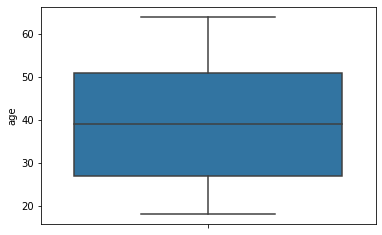

In [431]:
sns.boxplot(y = df['age'])

In [432]:
df['age_cut'] = pd.cut(df['age'], bins=5)

<AxesSubplot:xlabel='age', ylabel='hospitalization charges'>

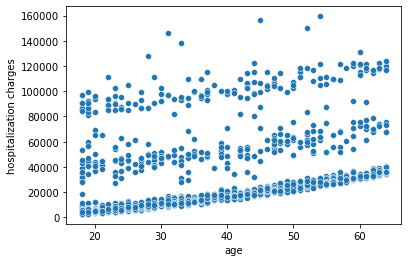

In [433]:
sns.scatterplot(x = df['age'], y = df['hospitalization charges'])

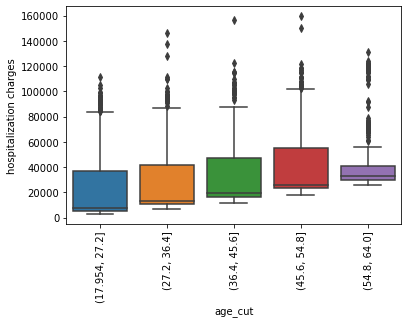

In [434]:
sns.boxplot(x =df['age_cut'], y = df['hospitalization charges'])
plt.xticks(rotation =90)
plt.show()

/Users/anshu/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


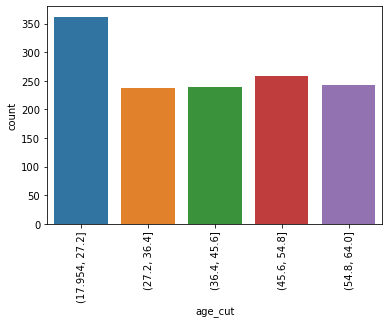

In [435]:
sns.countplot(df['age_cut'])
plt.xticks(rotation =90)
plt.show()

### The data captures people with age between 18-64 years with median age at around 40. We can see clearly that there are 3 bands of hospitalization charges which doesn't seem to depend upon age. One observation is for elders, hospitalization charges are more. This is intutive as elders tend to develop other complications as well.  We can also see from age bins, that data covers > 200 (~19%) records for age group 18-23 whereas for others, number of records stays at around 100-150. 

# 2. sex

In [436]:
(df['sex'].value_counts()/len(df))*100

male      50.523169
female    49.476831
Name: sex, dtype: float64

<AxesSubplot:xlabel='sex', ylabel='count'>

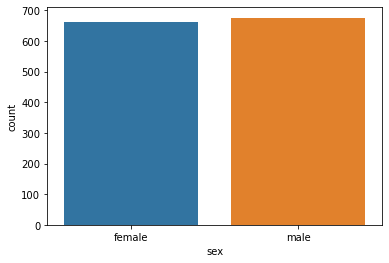

In [437]:
sns.countplot(df['sex'])

<AxesSubplot:xlabel='sex', ylabel='hospitalization charges'>

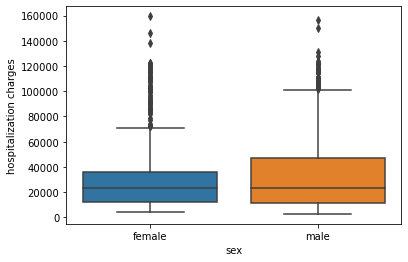

In [438]:
sns.boxplot(x = df['sex'], y = df['hospitalization charges'])

In [439]:
df[df['sex'] == 'female']['hospitalization charges'].describe()

count       662.000000
mean      31423.945619
std       27821.764763
min        4019.000000
25%       12213.250000
50%       23532.500000
75%       36136.750000
max      159426.000000
Name: hospitalization charges, dtype: float64

In [440]:
df[df['sex'] == 'male']['hospitalization charges'].describe()

count       676.000000
mean      34891.884615
std       32427.562163
min        2805.000000
25%       11548.000000
50%       23424.000000
75%       47473.750000
max      156482.000000
Name: hospitalization charges, dtype: float64

<AxesSubplot:xlabel='age', ylabel='hospitalization charges'>

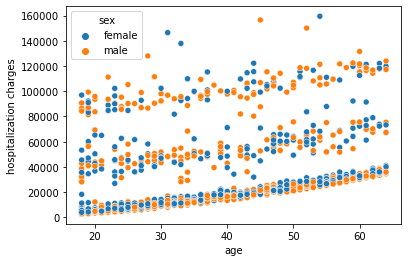

In [441]:
sns.scatterplot(x = df['age'],y = df['hospitalization charges'], hue = df['sex'])

### Number of males and feamles are almost equally distributed in data. The median hospitalization charges is almost in both males, however the mean hospitalization charges is more in male than females due to more extreme values in male data. As before, there is an upward trend of hospitalization charges with age, but from this plot above, this doesn't seem to much dependent on sex. We can test this in our hypothesis testing analysis.

# 3. smoker

In [442]:
df['smoker'].value_counts()/len(df)

no     0.795217
yes    0.204783
Name: smoker, dtype: float64

/Users/anshu/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoker', ylabel='count'>

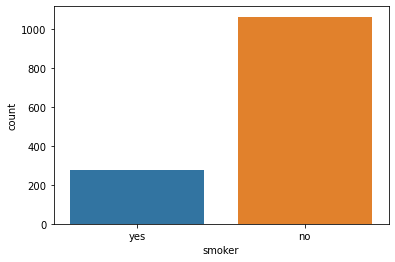

In [443]:
sns.countplot(df['smoker'])

<AxesSubplot:xlabel='smoker', ylabel='hospitalization charges'>

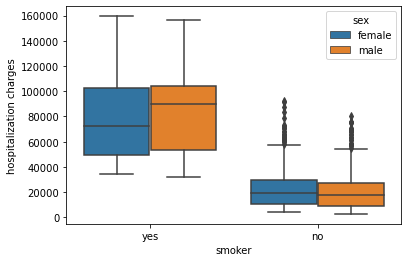

In [444]:
sns.boxplot(x = df['smoker'], y = df['hospitalization charges'],hue=df['sex'])

### The data consists of mostly (80%) non-smokers whereas 20% of data belongs to people who smoke. But hospitalization charges is significantly higher in those people who smoke. We can test this findings in our hypothesis testing that whether is finding is just by chance or hospitalization charges is significantly affected by smokers.

# 4. region

In [445]:
df['region'].value_counts()/len(df)

southeast    0.272048
southwest    0.242900
northwest    0.242900
northeast    0.242152
Name: region, dtype: float64

<AxesSubplot:xlabel='region', ylabel='hospitalization charges'>

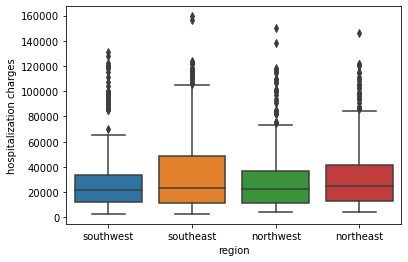

In [446]:
sns.boxplot(x = df['region'], y = df['hospitalization charges'])

### The data has equal distribution of people from all four regions. Hospitalization charges seem to be not affected by region. Almost all the region seems to have similar median value and similar distribution. Also, the 

# 5.viral load	

In [447]:
df['viral load'].describe()	

count    1338.000000
mean       10.221233
std         2.032796
min         5.320000
25%         8.762500
50%        10.130000
75%        11.567500
max        17.710000
Name: viral load, dtype: float64

### The range of viral load is from 5 to 18 with mean and median value of around 10.

<AxesSubplot:ylabel='viral load'>

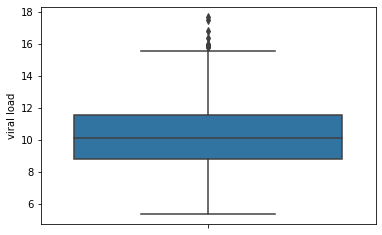

In [448]:
sns.boxplot(y = df['viral load'])

### 75% of data falls in range 5-12 viral load but there are extreme values with viral load > 16.

/Users/anshu/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


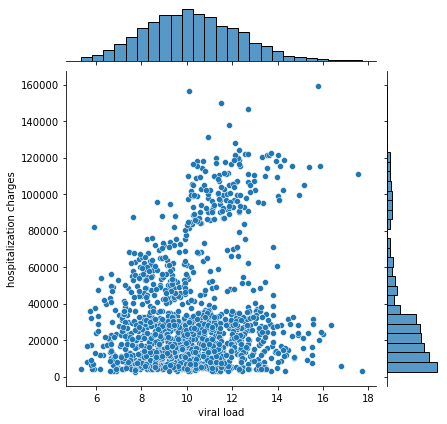

In [449]:
sns.jointplot(df['viral load'] , df['hospitalization charges'])
plt.show()

### Lets see how viral load is dependent of hospitalization charges. For viral load <10, hospitalization charges seem to be less. With scatter plot, we can clearly see there are two data cloud with higher hospitalization charges have viral load > 10. But there are data points with lower hospitalization charges even though viral load is more than 10. Lets see if we can further find out factors attributing to higher hospitalization charges.

/Users/anshu/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


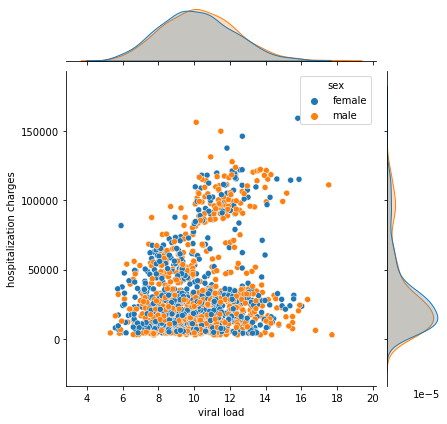

In [450]:
sns.jointplot(df['viral load'] , df['hospitalization charges'], hue= df['sex'])
plt.show()

### It doesn't seem to be affected by males or females. 

/Users/anshu/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


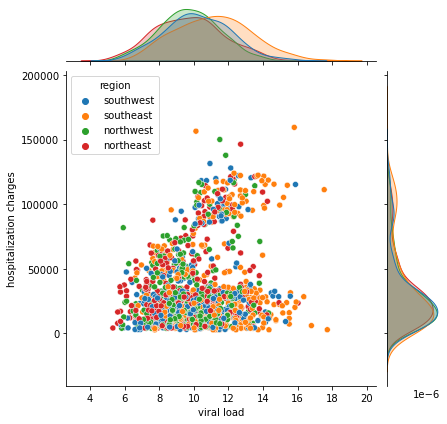

In [451]:
sns.jointplot(df['viral load'] , df['hospitalization charges'], hue= df['region'])
plt.show()

### even with region, higher hospitalization charges don't seem to be affected

/Users/anshu/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


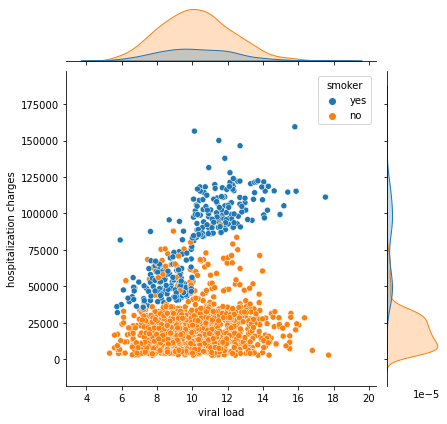

In [452]:
sns.jointplot(df['viral load'] , df['hospitalization charges'], hue= df['smoker'])
plt.show()

### now we can clearly see that higher hospitalization charges belong to people who smoke. So, for people with similar viral load, but if a person is smoker, hospitalization charges is higher. This observation we have seen in covid-19 times that people who smoke, they tend to develop more complications. 

# 6.severity level

In [453]:
df['severity level'].value_counts()/len(df)

0    0.428999
1    0.242152
2    0.179372
3    0.117339
4    0.018685
5    0.013453
Name: severity level, dtype: float64

In [454]:
### severity level is categorical feature. So, we need to convert it.

In [455]:
df['severity level'] = df['severity level'].astype('category')

<AxesSubplot:xlabel='severity level', ylabel='hospitalization charges'>

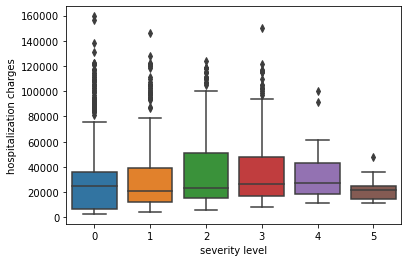

In [456]:
sns.boxplot(x = df['severity level'], y= df['hospitalization charges'])

### The median hospitalization charges is almost similar across 0-5 severity levels but with 0, there seems to be more extreme values. 

<AxesSubplot:xlabel='severity level', ylabel='age'>

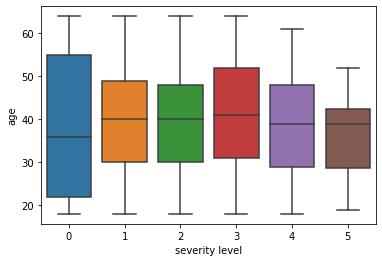

In [457]:
sns.boxplot(x = df['severity level'], y= df['age'])

<AxesSubplot:xlabel='severity level', ylabel='viral load'>

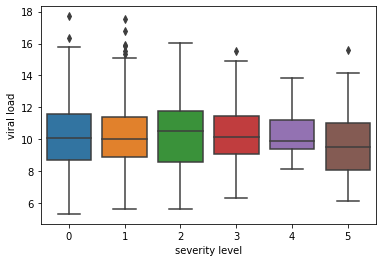

In [458]:
sns.boxplot(x = df['severity level'], y= df['viral load'])

### As there are 42% of data where severity level is 0, the data spans age group between 23-55years, whereas for severity level 1-4, the age span is ~ 30-50years. Also, viral load varies betweem ~9-12 across all severity level. 

### some bivariate analysis:

<AxesSubplot:xlabel='region', ylabel='hospitalization charges'>

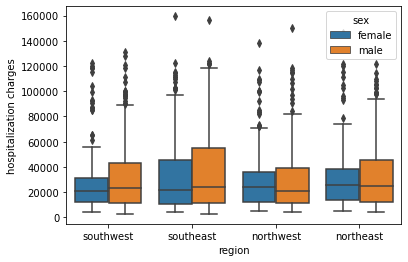

In [459]:
sns.boxplot(x = df['region'], y = df['hospitalization charges'],hue=df['sex'])

<AxesSubplot:xlabel='region', ylabel='hospitalization charges'>

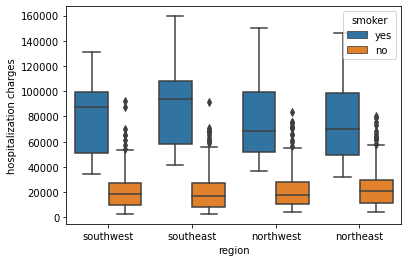

In [460]:
sns.boxplot(x = df['region'], y = df['hospitalization charges'],hue=df['smoker'])

<AxesSubplot:xlabel='smoker', ylabel='hospitalization charges'>

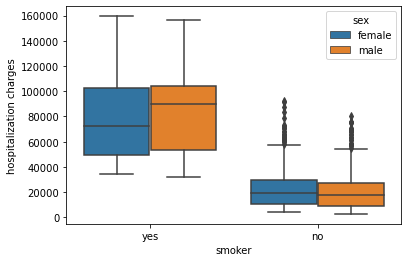

In [461]:
sns.boxplot(x = df['smoker'], y = df['hospitalization charges'],hue=df['sex'])

<AxesSubplot:xlabel='smoker', ylabel='hospitalization charges'>

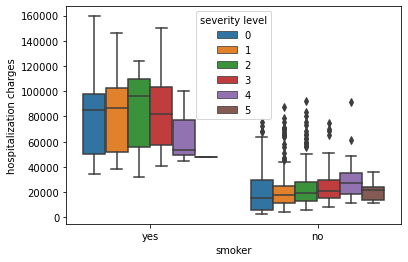

In [462]:
sns.boxplot(x = df['smoker'], y = df['hospitalization charges'],hue=df['severity level'])

### hospitalization charges for people who smoke is higher irrespective of region, gender and severity level (in general).However, within each category of smoker, the median hospitalization charges vary with 4-5 being lowest hospitalization charges.

<AxesSubplot:xlabel='region', ylabel='hospitalization charges'>

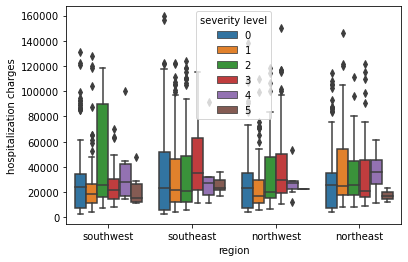

In [463]:
sns.boxplot(x = df['region'], y = df['hospitalization charges'],hue=df['severity level'])

### within each region, median hospitalization charges seem to vary depending upon severity levels

In [464]:
df.columns

Index(['age', 'sex', 'smoker', 'region', 'viral load', 'severity level',
       'hospitalization charges', 'age_cut'],
      dtype='object')

In [465]:
### lets see 

### lets analyse distribution of continuous features. 

In [466]:
cols = ['age',	'viral load','hospitalization charges']

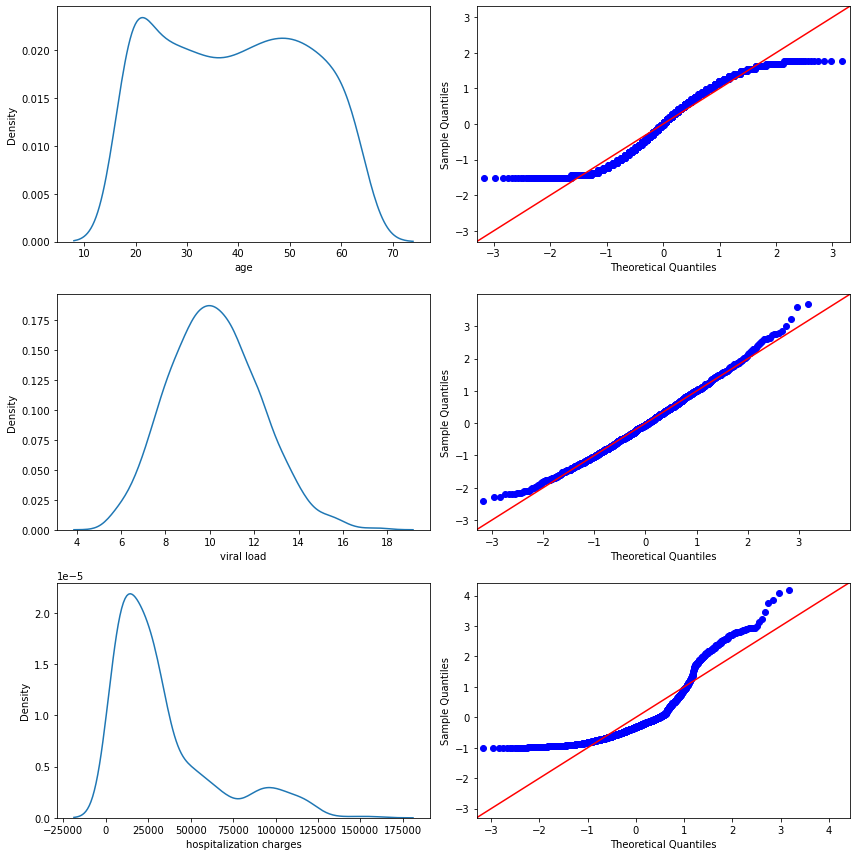

In [467]:
n= 0
f, axes = plt.subplots(3, 2, figsize=(12,12))

for col in cols:

    count=0
#     sns.displot(data= df, x= df[col], kind= "kde", ax=axes[n,count]) 
    sns.kdeplot(data= df, x= df[col], ax=axes[n,count]) 
    
    count+=1

    sm.qqplot(df[col], stats.norm, fit=True, line="45", ax=axes[n,count]) 

    count+=1
    n+=1

    plt.tight_layout()

In [468]:
df.columns

Index(['age', 'sex', 'smoker', 'region', 'viral load', 'severity level',
       'hospitalization charges', 'age_cut'],
      dtype='object')

<AxesSubplot:xlabel='hospitalization charges', ylabel='Density'>

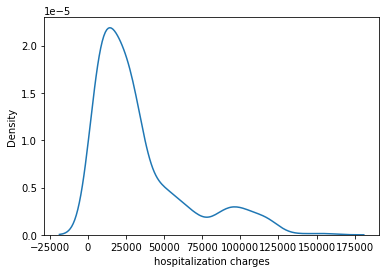

In [469]:
sns.kdeplot(df['hospitalization charges'])

### We can see a right tailed distribution for hospitalization charges. One reason could be 'smokers' as we have seen above. Lets try to use some transformation to check if it follows normal distribution.

<AxesSubplot:xlabel='hospitalization charges', ylabel='Density'>

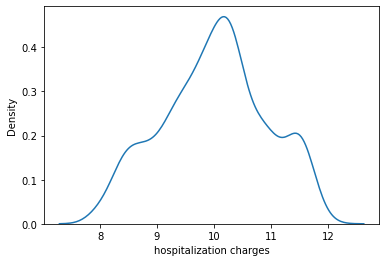

In [470]:
sns.kdeplot(np.log(df['hospitalization charges']))

### we can see it almost follow a normal distribution but we can check with box-cox transform to get appropriate transformation. 

In [471]:
from scipy.stats import boxcox

In [472]:
df['hospitalization_charges_boxcox'],_ = boxcox(df['hospitalization charges'])

<AxesSubplot:xlabel='hospitalization_charges_boxcox', ylabel='Density'>

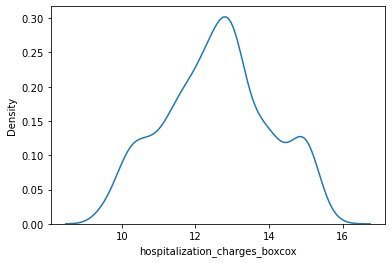

In [473]:
sns.kdeplot(df['hospitalization_charges_boxcox'])

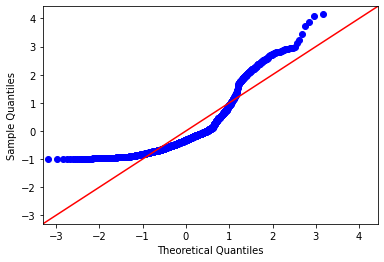

In [474]:
sm.qqplot(df['hospitalization charges'], stats.norm, fit=True, line="45") 
py.show()


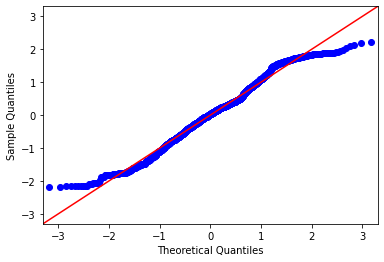

In [475]:
sm.qqplot(df['hospitalization_charges_boxcox'], stats.norm, fit=True, line="45") 
py.show()



### as we can see from above qq plot, that hospitalization charges had right-tailed distribution , but after boxcox transformation, we got almost normal distribution curve. We will use this transformed feature in our further analysis.

### we will use pearson correlation coefficient to determine strength of correlation between continuous features (age, viral laod, hospitalization charges). However, for categorical features (sex, smoker, region), we will use chi-square test to check significance of association.

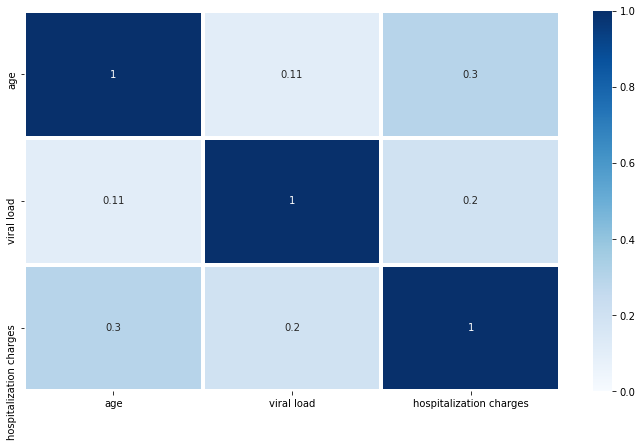

In [476]:
cormap = df[cols].corr(method='pearson')
plt.figure(figsize=(12,7))
sns.heatmap(cormap,annot=True,linewidth =3,cmap='Blues', vmax=0,vmin=1)
plt.show()

### we can observe positive correlation coefficient between hospitalization charges and age ; hospitalization charges and viral load. Also, viral load and age seems to have some positive correlation, though not strong but we can check with hypothesis testing. 

# lets investigate 3 bands in hospitalization

In [477]:
df['hospitalization charges'].describe()

count      1338.000000
mean      33176.058296
std       30275.029296
min        2805.000000
25%       11851.000000
50%       23455.000000
75%       41599.500000
max      159426.000000
Name: hospitalization charges, dtype: float64

In [478]:
df['hospitalization_charges_cut']=pd.cut(df['hospitalization charges'], bins = 3)

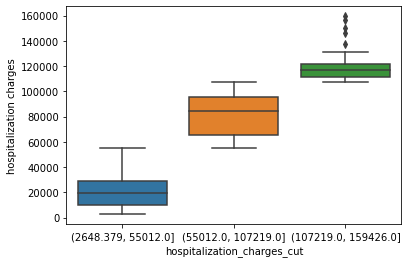

In [479]:
sns.boxplot(x =df['hospitalization_charges_cut'], y = df['hospitalization charges'])
plt.show()

/Users/anshu/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


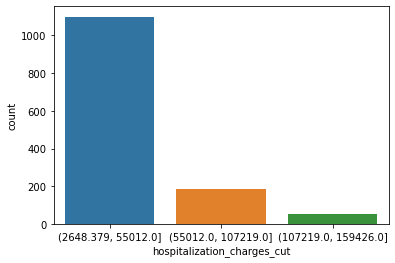

In [480]:
sns.countplot(df['hospitalization_charges_cut'])
plt.show()

In [481]:
df['hospitalization_charges_cut'].value_counts()/len(df) *100

(2648.379, 55012.0]     82.137519
(55012.0, 107219.0]     13.826607
(107219.0, 159426.0]     4.035874
Name: hospitalization_charges_cut, dtype: float64

### we can see around 85% of data has hospitalization charges less than 55k. Lets see if we can get any characterization of those bands.

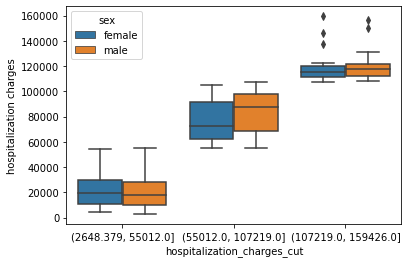

In [482]:
sns.boxplot(x =df['hospitalization_charges_cut'], y = df['hospitalization charges'], hue=df['sex'])
plt.show()

### it is similar across gender

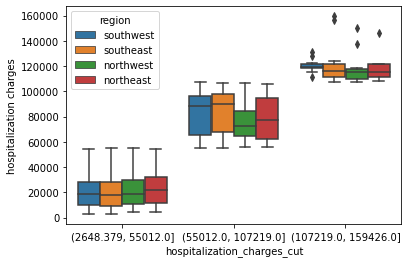

In [483]:
sns.boxplot(x =df['hospitalization_charges_cut'], y = df['hospitalization charges'], hue=df['region'])
plt.show()

### it is similar across regions

<AxesSubplot:xlabel='age', ylabel='hospitalization charges'>

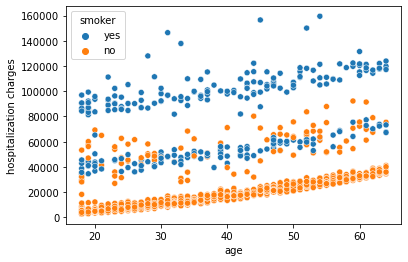

In [484]:
sns.scatterplot(x = df['age'],y = df['hospitalization charges'], hue = df['smoker'])

In [485]:
df.columns

Index(['age', 'sex', 'smoker', 'region', 'viral load', 'severity level',
       'hospitalization charges', 'age_cut', 'hospitalization_charges_boxcox',
       'hospitalization_charges_cut'],
      dtype='object')

# Conclusions: 

### 1. We saw that hospitalization charges is correlated with "smoker"
### 2. Hospitalization charges increases with age. 
### 3. There is not much effect of gender on hospitalization charges .
### 4. For viral load < 10, hospitalization charges seem to be less. However, for viral load >10, the charges vary from being low to high. 
### 5. There seems to be no effect of region on hospitalization charges. 
### 6. With severity level of 0, mean hospitalization charges seem to be higher due to more extreme values. However, for severity level of 5, mean hospitalization charges seem to be low with less extreme values. 
### 7. Severity levels seem to vary across regions. Within a region itself, the median severity level seem to be different. Same for other categorical variables like smoker. 

# Section 2: Hypothesis testing

In [486]:

### we will set level of significance (alpha) = 5% 
### alpha = 0.05

In [487]:
df.columns

Index(['age', 'sex', 'smoker', 'region', 'viral load', 'severity level',
       'hospitalization charges', 'age_cut', 'hospitalization_charges_boxcox',
       'hospitalization_charges_cut'],
      dtype='object')

# 1. Age
### EDA analysis suggested that age and hospitalization charges are continous variables and correlation coefficent is 0.3 which indicates as age increases , hospitalization charges shows an increase. But the strength doesn't seem to be strong. So, for our analysis below, we will use age_cut feature which is categorical. 

### Hypothesis : average hospitalization charges is same across all age ranges
### Discussion : as 'age_cut' is categorical variable and y-variable ('hospitalization charges') is continuous, 
### we will use Annova test here which will compute F-statistics as MSB/MSW and depending on test statistics, we can compare p-value and alpha to make decisions.


### Null hypothesis, H0 = average hospitalization charges is independent of age_cut
### Alternate hypothesis, Ha = average hospitalization charges depends of age bracktes  


In [488]:
df['age_cut'] = df['age_cut'].astype(str)

In [489]:
df['age_cut'].unique()

array(['(17.954, 27.2]', '(27.2, 36.4]', '(45.6, 54.8]', '(36.4, 45.6]',
       '(54.8, 64.0]'], dtype=object)

In [490]:
from scipy.stats import f_oneway

# data preparation for the test

dataAge1 = df[df['age_cut'] == '(17.954, 27.2]']['hospitalization_charges_boxcox']
dataAge2 = df[df['age_cut'] == '(27.2, 36.4]']['hospitalization_charges_boxcox']
dataAge3 = df[df['age_cut'] == '(36.4, 45.6]']['hospitalization_charges_boxcox']
dataAge4 = df[df['age_cut'] == '(45.6, 54.8]']['hospitalization_charges_boxcox']
dataAge5 = df[df['age_cut'] == '(54.8, 64.0]']['hospitalization_charges_boxcox']

# test statistics and p-value

ts ,p_value = f_oneway(dataAge1, dataAge2, dataAge3, dataAge4, dataAge5)

alpha = 0.05

print("p value is " + str(p_value))

if p_value <= alpha:
    print('as p-value is very low ,we reject H0 => conclusion: average hospitalization charges depends of age bracktes ')
else:
    print('as p-value > alpha, we fail to reject H0 => conclusion: average hospitalization charges is independent of age bracktes"')


p value is 1.5810768667955805e-84
as p-value is very low ,we reject H0 => conclusion: average hospitalization charges depends of age bracktes 


# 2. smoker
### Hypothesis : average hospitalization charge is same across people who smoke or people who don't

### Discussion : as 'smoker' is categorical variable with 2 unique values and y-variable ('hospitalization charges') is continuous, we will use z-test (as number of samples in each category >30) here which will compute z statistics and depending on test statistics, we can compare p-value and alpha to make decisions.

### Null hypothesis, H0 = average hospitalization charges is independent of smoker (yes or no)
### Alternate hypothesis, Ha = average hospitalization charges depends of smoking habit (yes or no)

In [491]:
from statsmodels.stats.weightstats import ztest as ztest


# test statistics and p-value

ts ,p_value= ztest(df[df['smoker'] == 'yes']['hospitalization_charges_boxcox'], df[df['smoker'] == 'no']['hospitalization_charges_boxcox'])

alpha = 0.05

print("p value is " + str(p_value))

if p_value <= alpha:
    print('as p-value is very low ,we reject H0  => conclusion: average hospitalization charges depends of "smoker" ie. if a person is smoker or not')
else:
    print('as p-value > alpha, we fail to reject H0 => conclusion: average hospitalization charges independent of "smoker"')
    
    

p value is 4.897675445136824e-246
as p-value is very low ,we reject H0  => conclusion: average hospitalization charges depends of "smoker" ie. if a person is smoker or not


### we can also check if average hospitalization charges is greater for people who smoke than people who dont.In this case we will use right tailed z-test, as number of samples is >30 in each category

### Null hypothesis, H0 = average hospitalization charges is less than or equal to in people who smoke than people who dont
### Alternate hypothesis, Ha = average hospitalization charges is greater in case of people who smoke than people who dont.

In [493]:
from statsmodels.stats.weightstats import ztest as ztest


# test statistics and p-value

ts ,p_value= ztest(df[df['smoker'] == 'yes']['hospitalization_charges_boxcox'], df[df['smoker'] == 'no']['hospitalization_charges_boxcox'], alternative = 'larger')

alpha = 0.05

print("p value is " + str(p_value))

if p_value <= alpha:
    print('as p-value is very low ,we reject H0  => conclusion: average hospitalization charges is greater in case of people who smoke than people who dont.')
else:
    print('as p-value > alpha, we fail to reject H0 => conclusion: average hospitalization charges is less than or equal to in people who smoke than people who dont')
    
    

p value is 2.448837722568412e-246
as p-value is very low ,we reject H0  => conclusion: average hospitalization charges is greater in case of people who smoke than people who dont.


In [494]:
len(df[df['smoker'] == 'no'])

1064

# 3. viral load 

### Hypothesis : average viral load is same across males and females

### Discussion : as 'sex' is categorical variable with 2 unique values and y-variable ('viral laod) is continuous, we will use z-test (as number of samples in each category >30) here which will compute z statistics and depending on test statistics, we can compare p-value and alpha to make decisions.

### Null hypothesis, H0 = average viral load is independent of sex (male or female)
### Alternate hypothesis, Ha = average viral load depends on sex (male or female)

In [495]:
from statsmodels.stats.weightstats import ztest as ztest


# test statistics and p-value

ts ,p_value= ztest(df[df['sex'] == 'female']['viral load'], df[df['sex'] == 'male']['viral load'])

alpha = 0.05

print("p value is " + str(p_value))

if p_value <= alpha:
    print('as p-value is very low ,we reject H0  => conclusion: average viral load is different in females than males')
else:
    print('as p-value > alpha, we fail to reject H0 => conclusion: average viral load independent of sex (male/female)')
    
    

p value is 0.08994059315726398
as p-value > alpha, we fail to reject H0 => conclusion: average viral load independent of sex (male/female)


# 4. Region
### we will test if proportion of smoking is same across region or not. Since both of them (Region and smoker) are categorical featuresm we will use chi-square test to check if they are independent or not.

In [496]:

### Null hypothesis, H0 = variable smoker is independent of region
### Alternate hypothesis, Ha = variable smoker depends of region 

from scipy.stats import chi2_contingency

#data preparation

data = np.array((df.groupby('region', as_index=False)['smoker'].count()).iloc[:,1])

stat, p_value, dof, expected = chi2_contingency(data)

alpha = 0.05

print("p value is " + str(p_value))

if p_value <= alpha:
    print('as p-value is low ,we reject H0 => conclusion: "smoker" depends of "reigion" in which person stays')
else:
    print('as p-value > alpha, we fail to reject H0 => conclusion: "smoker" is independent of "region" in which person stays')

    

p value is 1.0
as p-value > alpha, we fail to reject H0 => conclusion: "smoker" is independent of "region" in which person stays


# 5. Severity level

### we will test if mean viral load of women with different severity levels same or different. SInce y is continuous variable and with x is categorical, we can use annova to check if average value of viral load is same or not

In [497]:
### Null hypothesis, H0 = mean viral load of women is same in severity levels 0,1,and 2
### Alternate hypothesis, Ha = mean viral load of women is different in severity levels 0,1,and 2

from scipy.stats import f_oneway

# data preparation for the test

dataViralLoad0 = df[(df['sex'] == 'female') & (df['severity level'] == 0)]['viral load']
dataViralLoad1 = df[(df['sex'] == 'female') & (df['severity level'] == 1)]['viral load']
dataViralLoad2 = df[(df['sex'] == 'female') & (df['severity level'] == 2)]['viral load']

# test statistics and p-value

ts ,p_value = f_oneway(dataViralLoad0, dataViralLoad1, dataViralLoad2)

alpha = 0.05

print("p value is " + str(p_value))

if p_value <= alpha:
    print('as p-value is very low ,we reject H0 => conclusion: mean viral load of women is different in severity levels 0,1,and 2')
else:
    print('as p-value > alpha, we fail to reject H0 => conclusion: mean viral load of women is same in severity levels 0,1,and 2')



p value is 0.7151189650367746
as p-value > alpha, we fail to reject H0 => conclusion: mean viral load of women is same in severity levels 0,1,and 2


# conclusions

### based on above EDA and statistical test, it came out very evident that:

### 1. Hospitalization charges depends on Age. It is higher for older people, may be they tend to develop more complications with age. This is further validated from statistical tests that the observation holds true for population. 

### 2. Hospitalization charges depends on Smoking habit of people. If a person is smoker, hospitalization charges is more. With statistical tests also, we can confirm that this is strong indicator in population for higher hospitalization charges. May be people who smoke tend to develop more complications.

### 3. With EDA, we observed that people with viral load <10, hospitalization charges is less, whereas with viral load > 10, hospitalization charges vary with smoking habit of people. 